<a href="https://colab.research.google.com/github/pomkos/Finished-Projects/blob/master/doggy_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

Followed along with the the tutorial by [DataQuest](https://www.youtube.com/watch?v=9xcky8jXQAM&list=PL6UJrXaOPPcEesMFPaieQJwnBvKiRH2tT&index=5)

In [ ]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]

In [ ]:
import tensorflow as tf

In [ ]:
breeds

['beagle',
 'bernese_mountain_dog',
 'doberman',
 'labrador_retriever',
 'siberian_husky']

In [ ]:
breeds = ['beagle', 'bernese_mountain_dog', 'doberman', 'labrador_retriever', 'siberian_husky']

In [ ]:
# this got me an error where it couldn't find the folders.
# but manually adding arguments worked
args = {
    "labels":"inferred",
    "label_mode":"categorical",
    "batch_size":32, # process 32 images at a time in neural network
    "image_size":(256,256), # all images must be same size
    "seed":1,
    "validation_split":.2, # 20% for testing
    "class_names":breeds
}

In [ ]:
image_dir = "/content/drive/MyDrive/Tech Stuff/images"
# load all images into a tf dataset
# keras is very high level library
train = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    subset="training",
    labels="inferred",
    label_mode="categorical",
    batch_size=32, # process 32 images at a time in neural network
    image_size=(256,256), # all images must be same size
    seed=1,
    validation_split=0.2, # 20% for testing
    class_names=breeds)

test = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    subset="validation",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(256,256),
    seed=1,
    validation_split=0.2,
    class_names=breeds
)

Found 926 files belonging to 5 classes.
Using 741 files for training.
Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [ ]:
train

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
first=train.take(1) # take first batch (first 32 images)
first

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
# get all 32 images and all 32 labels
images, labels = list(first)[0]

In [ ]:
# 256 x 256 x 3
# Length x Width x Color
first_image = images[0]

In [ ]:
first_image[:3, :3, 0] # red

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[17.658463, 25.686066, 29.847656],
       [18.993622, 26.17189 , 29.454437],
       [17.373474, 19.348282, 25.176407]], dtype=float32)>

In [ ]:
first_image[:3, :3, 1] # green

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[26.107117, 24.405075, 24.580734],
       [26.708206, 26.147278, 22.608734],
       [24.858932, 19.05922 , 18.02797 ]], dtype=float32)>

In [ ]:
first_image[:3, :3, 2] # blue

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[18.948654, 20.66211 , 21.669708],
       [22.481903, 24.414856, 22.083344],
       [23.791443, 20.95375 , 19.969376]], dtype=float32)>

In [ ]:
from PIL import Image

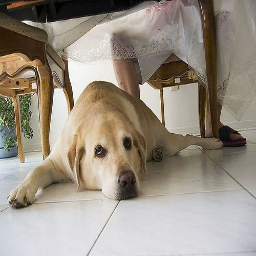

In [ ]:
Image.fromarray(first_image.numpy().astype("uint8"))

In [ ]:
# label of first_image
# it's a vector of dummy variables
labels[0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 1., 0.], dtype=float32)>

# Optimizations

In [ ]:
# prefetches images into memory
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Building a NN via Keras

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Sequential model will apply steps in a certain order to transform and predict data

model = Sequential([
# neural networks work best when values are 0-1
                    layers.Rescaling(1./255),
# run convolutional neural network
# apply 16 filters to the image, look at 3x3 set of pixels at a time, 
# padding says what to do at edges of image, activation is how
# neural networks get from input to output data (what is a sig feature)
                    layers.Conv2D(16,3, padding="same", activation="relu", input_shape=(256,256,3)),
# Flatten layers to get a single matrix output, unlike a convolutional NN
                    layers.Flatten(),
# Dense NN lets us get prediction at end
                    layers.Dense(128, activation="relu"),
                    layers.Dense(len(breeds))
])

In [ ]:
# compile model into a form so we can train and make predictions with it
# optimizer tells model how to predict error and iterate through mult runs of model
# loss function is how it calculates error
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy'])

In [ ]:
# validation and accuracy should go up over each epoch
history = model.fit(
    train,
    validation_data=test, # check for over/underfitting
    epochs=5, # run multiple times to improve model
    verbose=1, # how much output shown to us as model is run
)

Epoch 1/5
24/24 [==============================] - 64s 2s/step - loss: 61.2065 - accuracy: 0.2294 - val_loss: 11.0766 - val_accuracy: 0.2649
Epoch 2/5
24/24 [==============================] - 1s 58ms/step - loss: 5.3492 - accuracy: 0.2281 - val_loss: 3.3406 - val_accuracy: 0.2595
Epoch 3/5
24/24 [==============================] - 1s 58ms/step - loss: 1.9313 - accuracy: 0.3144 - val_loss: 1.8716 - val_accuracy: 0.2432
Epoch 4/5
24/24 [==============================] - 1s 58ms/step - loss: 1.4165 - accuracy: 0.4184 - val_loss: 2.0741 - val_accuracy: 0.2811
Epoch 5/5
24/24 [==============================] - 1s 58ms/step - loss: 1.5500 - accuracy: 0.4211 - val_loss: 2.1686 - val_accuracy: 0.2811


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 flatten (Flatten)           (None, 1048576)           0         
                                                                 
 dense (Dense)               (None, 128)               134217856 
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 134,218,949
Trainable params: 134,218,949
Non-trainable params: 0
_________________________________________________________________


1. Rescaling output everything that we put in, just rescaled
2. Convolution layer created 16 matrices of features it found from images
3. Flattened the features, created a long vector
4. Dense layer created pedictions
5. Next dense layer created one vector that says what category each image belongs to

In [ ]:
import pandas as pd

In [ ]:
# accuracy changing over time
history_df = pd.DataFrame.from_dict(history.history)
history_df[['accuracy', 'val_accuracy']]

accuracy  val_accuracy
0  0.229420      0.264865
1  0.228070      0.259459
2  0.314440      0.243243
3  0.418354      0.281081
4  0.421053      0.281081

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Change over time')

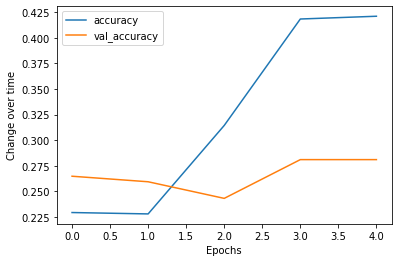

In [ ]:
history_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel('Epochs')
plt.ylabel('Change over time')

Model is overfitting, because accuracy goes way up but validation accuracy does not. Lots of params too.

The model is picking up random variation in training data and assumes its needed for predicting

# Fixing Overfitting

In [ ]:
def plot_accuracy(history_df):
  history_df[['accuracy', 'val_accuracy']].plot()
  plt.xlabel('Epochs')
  plt.ylabel('Change over time')

In [ ]:
def train_model(network, epochs=5):
  '''
  Trains the model as we did above

  network: the list of layers
  '''
  model = Sequential(network)
  # compile model using the given layers
  model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
    )
  # train model and validate it
  history = model.fit(
    train,
    validation_data=test, 
    epochs=epochs, 
    verbose=1,
    )
  history_df=pd.DataFrame.from_dict(history.history)
  return history_df, model

In [ ]:
network = [
# Same as before but modified conv window to 4
           layers.Rescaling(1./255),
           layers.Conv2D(16,4, 
                         padding="same", 
                         activation="relu", 
                         input_shape=(256,256,3)),
# reduces overfitting and runs model faster by reducing num params
           layers.MaxPooling2D(),
# increase filter to 32 to look at higher level features
# ex: look at dogs head instead of just ear
           layers.Conv2D(32,4, 
                         padding="same", 
                         activation="relu", 
                         input_shape=(256,256,3)),
           layers.MaxPooling2D(),
           layers.Conv2D(64,4, 
                         padding="same", 
                         activation="relu", 
                         input_shape=(256,256,3)),
           layers.MaxPooling2D(),
# prevents overfitting by randomly setting some outputs to 0
# so the model doesn't get too linked to training data
           layers.Dropout(.2),
           layers.Flatten(),
           layers.Dense(128, activation="relu"),
           layers.Dense(len(breeds))

]

In [ ]:
history_df, model = train_model(network, epochs=5)

Epoch 1/5
24/24 [==============================] - 4s 99ms/step - loss: 2.1724 - accuracy: 0.2213 - val_loss: 1.6103 - val_accuracy: 0.2000
Epoch 2/5
24/24 [==============================] - 1s 58ms/step - loss: 1.5551 - accuracy: 0.3077 - val_loss: 1.5778 - val_accuracy: 0.2919
Epoch 3/5
24/24 [==============================] - 1s 56ms/step - loss: 1.3256 - accuracy: 0.4588 - val_loss: 1.3874 - val_accuracy: 0.4216
Epoch 4/5
24/24 [==============================] - 1s 57ms/step - loss: 1.0881 - accuracy: 0.5830 - val_loss: 1.5012 - val_accuracy: 0.3568
Epoch 5/5
24/24 [==============================] - 1s 57ms/step - loss: 0.8543 - accuracy: 0.6761 - val_loss: 1.5524 - val_accuracy: 0.4324


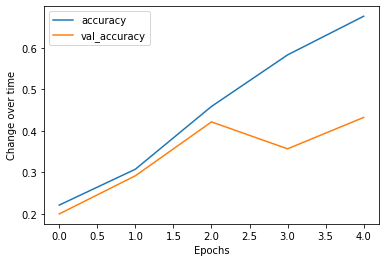

In [ ]:
plot_accuracy(history_df)

In [ ]:
history_df, model = train_model(network, epochs=10)

Epoch 1/10
24/24 [==============================] - 2s 63ms/step - loss: 1.0821 - accuracy: 0.5924 - val_loss: 1.4726 - val_accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 1s 56ms/step - loss: 0.7768 - accuracy: 0.7179 - val_loss: 1.6497 - val_accuracy: 0.3946
Epoch 3/10
24/24 [==============================] - 1s 58ms/step - loss: 0.5314 - accuracy: 0.8030 - val_loss: 1.8002 - val_accuracy: 0.4054
Epoch 4/10
24/24 [==============================] - 1s 56ms/step - loss: 0.3184 - accuracy: 0.8961 - val_loss: 2.0845 - val_accuracy: 0.3514
Epoch 5/10
24/24 [==============================] - 1s 58ms/step - loss: 0.2838 - accuracy: 0.9096 - val_loss: 2.2882 - val_accuracy: 0.3459
Epoch 6/10
24/24 [==============================] - 1s 57ms/step - loss: 0.2642 - accuracy: 0.9177 - val_loss: 2.2657 - val_accuracy: 0.3676
Epoch 7/10
24/24 [==============================] - 1s 57ms/step - loss: 0.1602 - accuracy: 0.9460 - val_loss: 4.1995 - val_accuracy: 0.3297
Epoch 8/10
24

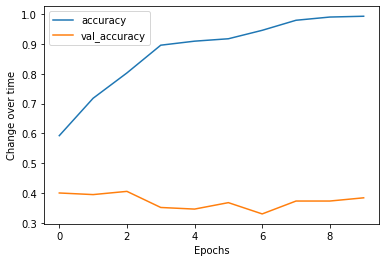

In [ ]:
plot_accuracy(history_df)

Similar accuracy, 0.3 vs 0.4, and `epoch=10` didn't change much either.

## Augment Data to Prevent Overfitting

Or: adding more data by randomly altering some stuff in images via Keras layers. No need to get more images

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal", seed=1), # randomly flip images
  layers.RandomRotation(.2, seed=1),
  layers.RandomZoom(.2, seed=1)
])

In [ ]:
# augment data before rescaling or anything
full_network = [data_augmentation] + network

In [ ]:
history_df, model = train_model(full_network)

Epoch 1/5
24/24 [==============================] - 3s 69ms/step - loss: 1.7254 - accuracy: 0.4157 - val_loss: 1.4599 - val_accuracy: 0.3459
Epoch 2/5
24/24 [==============================] - 2s 75ms/step - loss: 1.4373 - accuracy: 0.4022 - val_loss: 1.3998 - val_accuracy: 0.3730
Epoch 3/5
24/24 [==============================] - 2s 76ms/step - loss: 1.3947 - accuracy: 0.4332 - val_loss: 1.4109 - val_accuracy: 0.4162
Epoch 4/5
24/24 [==============================] - 2s 71ms/step - loss: 1.3005 - accuracy: 0.4602 - val_loss: 1.3918 - val_accuracy: 0.4324
Epoch 5/5
24/24 [==============================] - 1s 60ms/step - loss: 1.2534 - accuracy: 0.4953 - val_loss: 1.4343 - val_accuracy: 0.4216


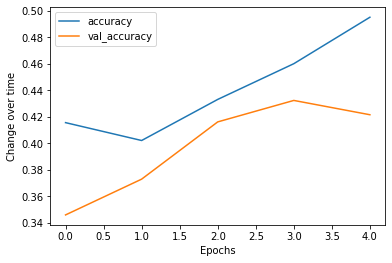

In [ ]:
plot_accuracy(history_df)

Much smaller difference between train and validation accuracy, there is less overfitting

In [ ]:
history_df, model = train_model(full_network, epochs=10)

Epoch 1/10
24/24 [==============================] - 3s 69ms/step - loss: 1.3091 - accuracy: 0.4926 - val_loss: 1.3950 - val_accuracy: 0.4000
Epoch 2/10
24/24 [==============================] - 1s 60ms/step - loss: 1.2559 - accuracy: 0.4858 - val_loss: 1.3920 - val_accuracy: 0.4541
Epoch 3/10
24/24 [==============================] - 1s 60ms/step - loss: 1.1765 - accuracy: 0.5236 - val_loss: 1.4354 - val_accuracy: 0.4486
Epoch 4/10
24/24 [==============================] - 1s 60ms/step - loss: 1.1567 - accuracy: 0.5439 - val_loss: 1.4182 - val_accuracy: 0.4216
Epoch 5/10
24/24 [==============================] - 1s 60ms/step - loss: 1.1458 - accuracy: 0.5479 - val_loss: 1.4117 - val_accuracy: 0.4216
Epoch 6/10
24/24 [==============================] - 1s 60ms/step - loss: 1.0932 - accuracy: 0.5749 - val_loss: 1.4097 - val_accuracy: 0.4054
Epoch 7/10
24/24 [==============================] - 1s 60ms/step - loss: 1.0809 - accuracy: 0.5830 - val_loss: 1.4077 - val_accuracy: 0.4541
Epoch 8/10
24

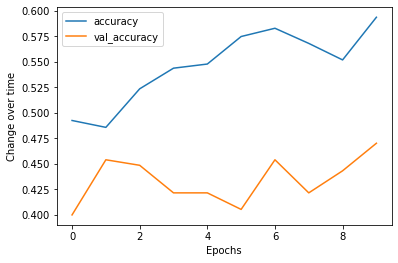

In [ ]:
plot_accuracy(history_df)

10 epochs increased accuracy a little bit too, but not a lot

# View Results

Let's see how the model performed, and what was misclassified

In [ ]:
# get a numpy array of predictions
preds = model.predict(test)

In [ ]:
import numpy as np

In [ ]:
# turn predictions into a single number, from 5 numbers
predicted_class = np.argmax(preds, axis=1)
predicted_class

array([0, 3, 1, 2, 0, 1, 2, 2, 1, 2, 1, 3, 0, 0, 2, 1, 0, 3, 1, 1, 3, 2,
       1, 4, 2, 0, 1, 0, 4, 1, 2, 0, 1, 0, 1, 1, 0, 0, 3, 3, 1, 2, 4, 1,
       4, 3, 0, 4, 0, 2, 2, 3, 3, 0, 1, 1, 2, 4, 2, 2, 2, 2, 2, 0, 3, 4,
       0, 1, 0, 4, 0, 2, 3, 3, 1, 2, 1, 2, 0, 0, 3, 2, 4, 0, 2, 2, 2, 4,
       0, 0, 4, 3, 0, 4, 0, 0, 2, 2, 0, 2, 1, 4, 4, 0, 4, 0, 3, 0, 4, 1,
       2, 0, 3, 1, 1, 0, 2, 3, 0, 4, 4, 1, 2, 4, 4, 1, 0, 2, 1, 4, 0, 1,
       0, 4, 0, 2, 4, 1, 2, 4, 1, 2, 3, 2, 4, 1, 0, 1, 1, 1, 4, 2, 4, 1,
       0, 2, 1, 0, 0, 3, 0, 1, 2, 0, 3, 4, 2, 2, 1, 0, 1, 1, 3, 0, 1, 3,
       2, 2, 1, 1, 0, 1, 1, 2, 3])

In [ ]:
actual_labels = np.concatenate([y for x,y in test], axis=0)
# turn into single numbers from vectors
actual_class = np.argmax(actual_labels, axis=1)

In [ ]:
actual_class

array([4, 1, 3, 3, 0, 3, 2, 2, 2, 1, 1, 0, 0, 4, 0, 1, 3, 0, 0, 1, 4, 2,
       1, 3, 2, 0, 1, 0, 3, 4, 1, 3, 1, 0, 1, 1, 4, 3, 4, 3, 1, 3, 0, 0,
       3, 4, 0, 4, 3, 0, 2, 3, 3, 1, 2, 1, 4, 4, 0, 3, 2, 2, 2, 3, 3, 0,
       3, 1, 3, 4, 4, 2, 3, 4, 1, 2, 1, 3, 0, 3, 2, 0, 1, 4, 1, 1, 1, 4,
       2, 4, 4, 3, 0, 4, 3, 3, 1, 2, 0, 2, 1, 4, 1, 4, 4, 4, 3, 0, 1, 1,
       2, 0, 3, 0, 4, 4, 2, 3, 0, 4, 1, 2, 1, 4, 4, 1, 2, 3, 1, 4, 0, 1,
       0, 4, 2, 2, 4, 4, 2, 4, 1, 1, 2, 1, 4, 2, 0, 0, 4, 1, 3, 1, 4, 2,
       0, 1, 1, 0, 4, 3, 2, 1, 3, 3, 4, 1, 1, 2, 0, 3, 1, 2, 4, 0, 4, 3,
       1, 0, 3, 2, 3, 0, 1, 1, 0])

In [ ]:
# look at actual image of dog
import itertools

In [ ]:
actual_image = [x.numpy().astype("uint8") for x,y in test] # convert images into np array of immages
# convert list of lists into a single list
actual_image = list(itertools.chain.from_iterable(actual_image))

In [ ]:
actual_image = [Image.fromarray(a) for a in actual_image]

In [ ]:
# put into dataframe
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"])

In [ ]:
# label labels
pred_df['prediction'] = pred_df['prediction'].apply(lambda x: breeds[x])
pred_df['actual'] = pred_df['actual'].apply(lambda x: breeds[x])

In [ ]:
pred_df.head()

prediction                actual  \
0                beagle        siberian_husky   
1    labrador_retriever  bernese_mountain_dog   
2  bernese_mountain_dog    labrador_retriever   
3              doberman    labrador_retriever   
4                beagle                beagle   

                                               image  
0  <PIL.Image.Image image mode=RGB size=256x256 a...  
1  <PIL.Image.Image image mode=RGB size=256x256 a...  
2  <PIL.Image.Image image mode=RGB size=256x256 a...  
3  <PIL.Image.Image image mode=RGB size=256x256 a...  
4  <PIL.Image.Image image mode=RGB size=256x256 a...

In [ ]:
# render image
import base64
import io

In [ ]:
def image_formatter(img):
  with io.BytesIO() as buffer:
    # write to an in memory object
    img.save(buffer, 'png')
    # read object and encode it into base64 string
    img_str = base64.b64encode(buffer.getvalue()).decode()
    # embed object into HTML
    return f'<img src="data:image/jpeg;base64,{img_str}">'


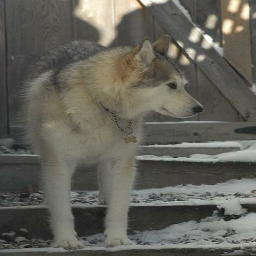
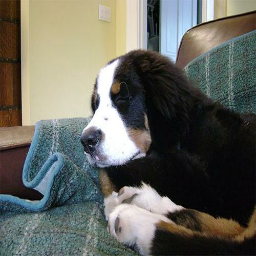
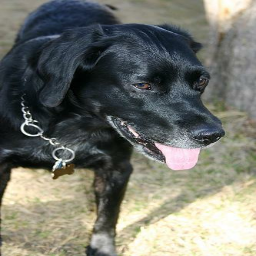
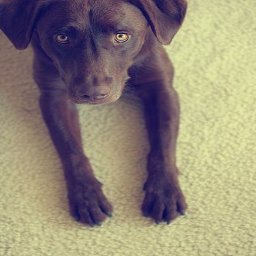
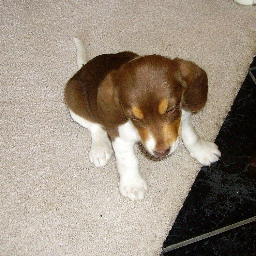
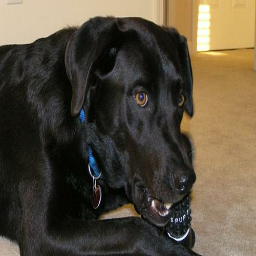
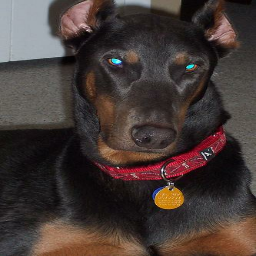
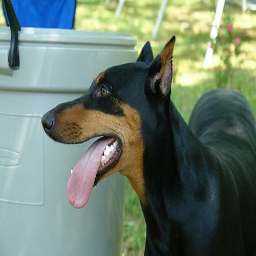
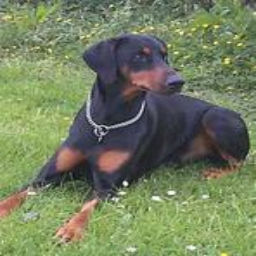
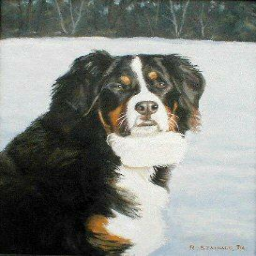

In [ ]:
pred_df.head(10).style.format({'image': image_formatter})

# Next Steps

1. Add more dog breeds
1. Tweak network to improve performance
  1. Change data augmentation
  1. Change layers